In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px

# Analysing the Data

In [ ]:
articles = pd.read_csv("articles.csv.zip")
customers = pd.read_csv("customers.csv.zip")
transactions = pd.read_csv("transactions_train.csv.zip")

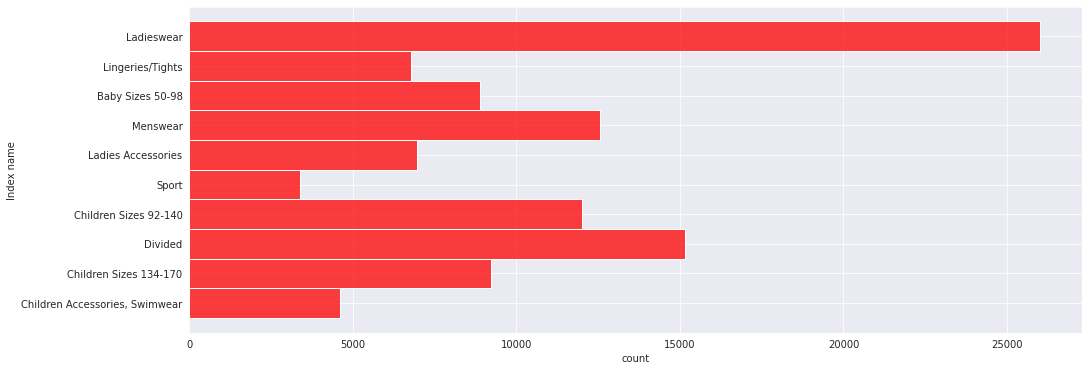

In [ ]:
# Conclusion - This tells that Ladies wear are present in more number and sport wear has less number of types.
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(16, 6))
ax = sns.histplot(data=articles, y='index_name', color='red')
ax.set_xlabel('count')
ax.set_ylabel('Index name')
plt.show()

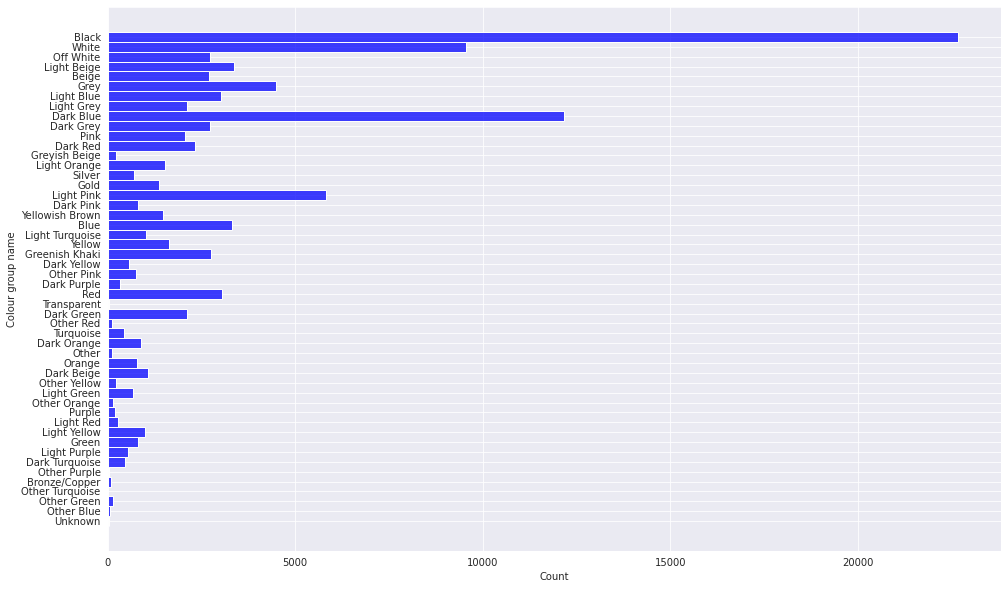

In [ ]:
# Conclusion - significant number of products are mostly black in colour followed by Dark blue, white, light pink.
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(16, 10))
ax = sns.histplot(data=articles, y='colour_group_name', color='blue')
ax.set_xlabel('Count')
ax.set_ylabel('Colour group name')
plt.show()

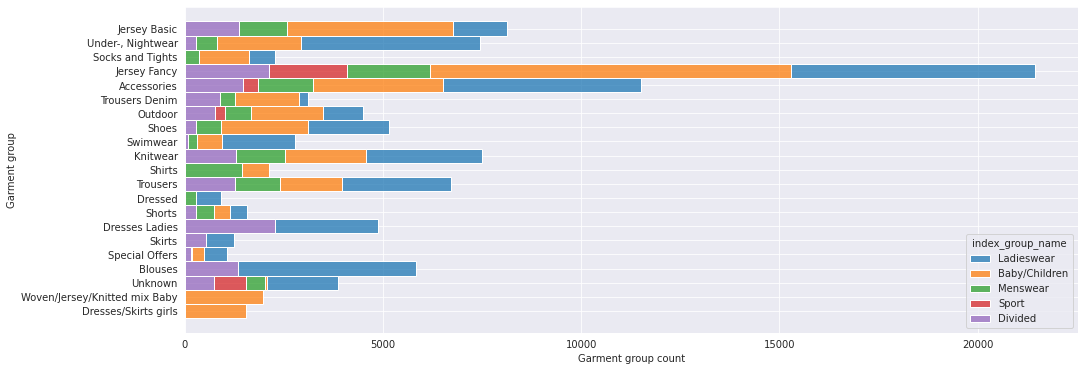

In [ ]:
# Conclusion - Among garment groups 'Jersey Fancy' has more different items and it has highest number of index types. 
f, ax = plt.subplots(figsize=(16, 6))
ax = sns.histplot(data=articles, y='garment_group_name', color='Orange', hue='index_group_name', multiple="stack")
ax.set_xlabel('Garment group count')
ax.set_ylabel('Garment group')
plt.show()

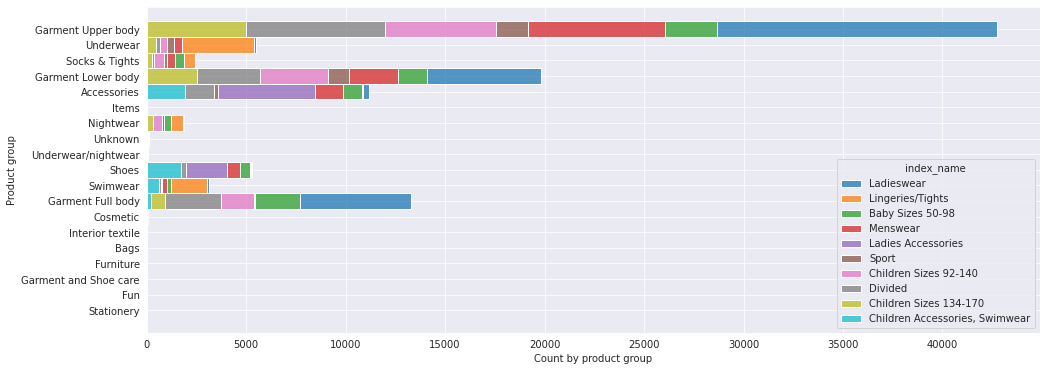

In [ ]:
# Conclusion - Among product groups 'Garment Upper body' has more different items and it has highest number of index types. 
f, ax = plt.subplots(figsize=(16, 6))
ax = sns.histplot(data=articles, y='product_group_name', color='blue', hue='index_name', multiple="stack")
ax.set_xlabel('Count by product group')
ax.set_ylabel('Product group')
plt.show()

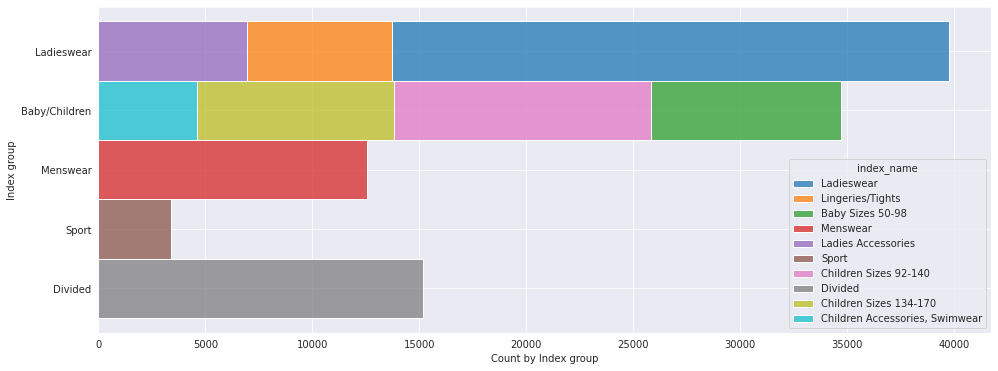

In [ ]:
# Conclusion - Among index groups Ladieswear and Baby/Children wear have the most varied number of types
f, ax = plt.subplots(figsize=(16, 6))
ax = sns.histplot(data=articles, y='index_group_name', color='orange', hue='index_name', multiple="stack")
ax.set_xlabel('Count by Index group')
ax.set_ylabel('Index group')
plt.show()

In [ ]:
articles.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

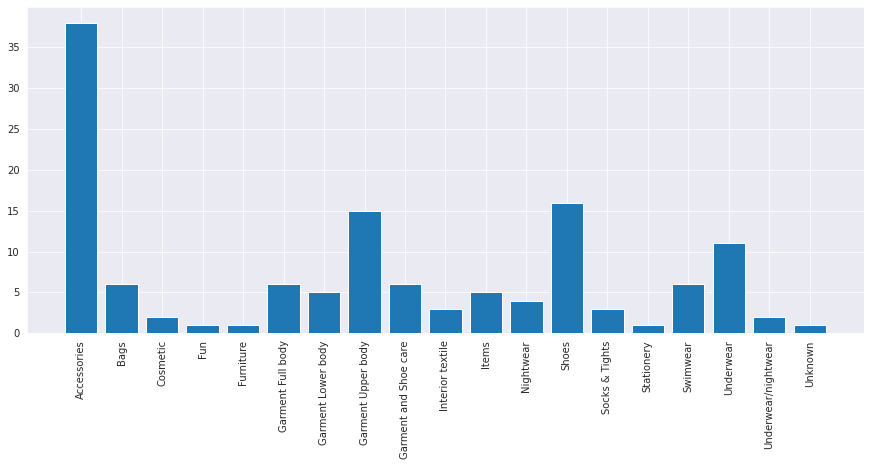

In [ ]:
product_detail = articles.groupby(["product_group_name"])["product_type_name"].nunique().reset_index()
plt.figure(figsize = (15,6))
plt.bar(product_detail["product_group_name"],product_detail["product_type_name"])
plt.xticks(rotation='vertical')
plt.show()

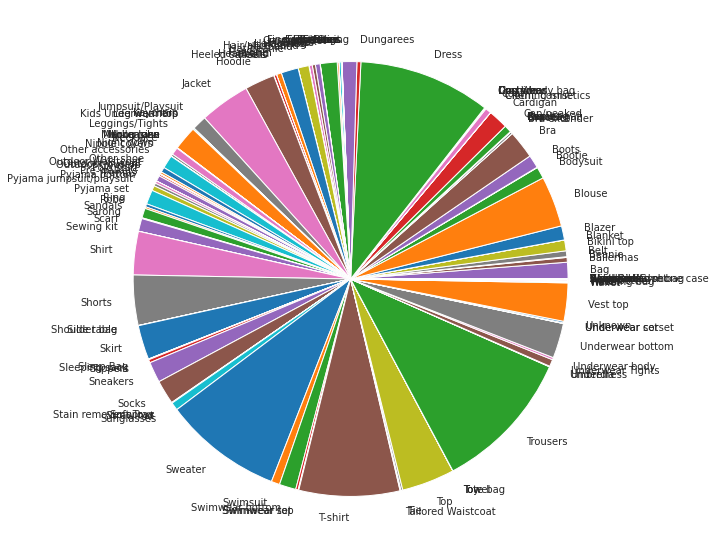

In [ ]:
product_type = articles.groupby(["product_type_name"]).count().reset_index()
plt.figure(figsize = (15,10))
plt.pie(product_type['article_id'], labels = product_type['product_type_name'])
plt.show()

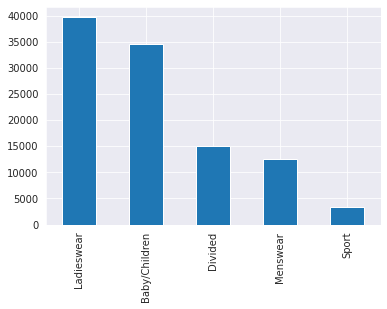

In [ ]:
articles['index_group_name'].value_counts().plot(kind="bar")

Customers

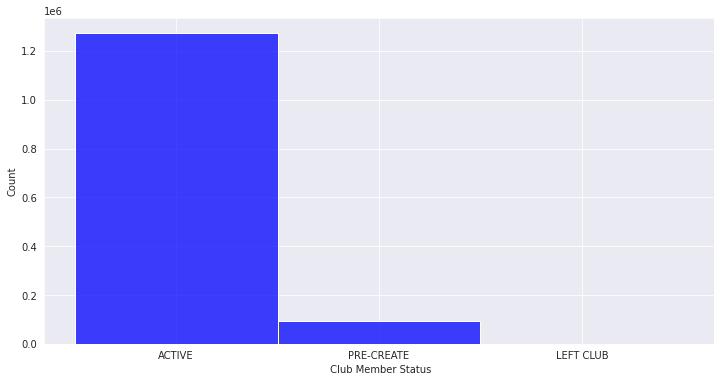

In [ ]:
# Conclusion - Most of the customers are active cutomers
f, ax = plt.subplots(figsize=(12,6))
ax = sns.histplot(data=customers, x='club_member_status', color='blue')
ax.set_xlabel(' Club Member Status')
plt.show()

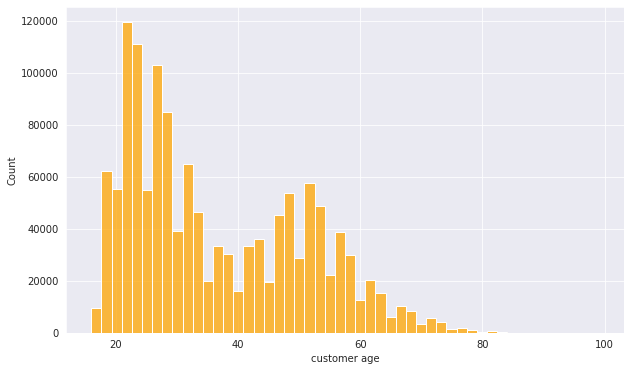

In [ ]:
# Conclusion - most number of customers are in the age group of 19 to 30
f, ax = plt.subplots(figsize=(10,6))
ax = sns.histplot(data=customers, x='age', bins=50, color='orange')
ax.set_xlabel('customer age')
plt.show()

  fashion_news_frequency  customer_id
0                Monthly          842
1                   NONE       877713
2              Regularly       477416


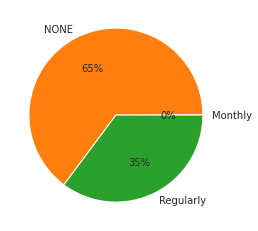

In [ ]:
# Conclusion - Most of the customers are not interested in fashion frequent news updates/notifications.
customers_new=customers
customers_new['fashion_news_frequency'] = customers_new['fashion_news_frequency'].replace(['None'],'NONE')
customer_grouped_data = customers_new[['customer_id', 'fashion_news_frequency']].groupby('fashion_news_frequency').count().reset_index()

#customer_grouped_data= customer_grouped_data.rename(index={None='NONE'}, inplace=True)

print(customer_grouped_data.head())

palette_color = sns.color_palette('bright')

plt.pie(customer_grouped_data.customer_id, labels=customer_grouped_data['fashion_news_frequency'], autopct='%.0f%%')

plt.show()

In [ ]:
# plots for Transactions dataset
transactions['t_dat']=pd.to_datetime(transactions['t_dat'])

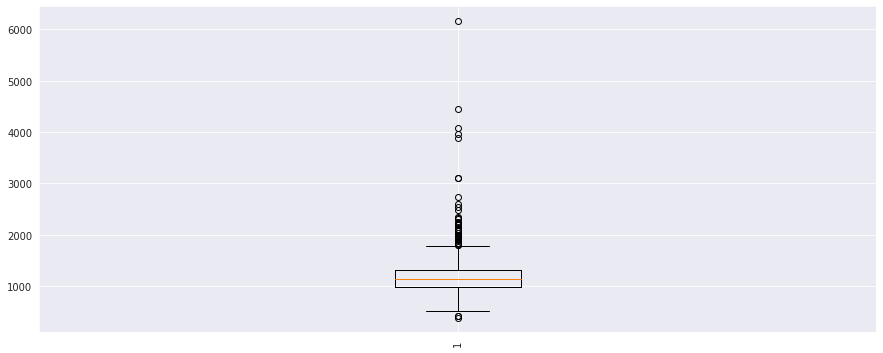

In [ ]:
df = transactions.groupby('t_dat')['price'].agg(['sum', 'mean']).sort_values(by = 't_dat', ascending=False).reset_index()
plt.figure(figsize = (15,6))

plt.boxplot(df['sum'])
plt.xticks(rotation='vertical')
plt.show()

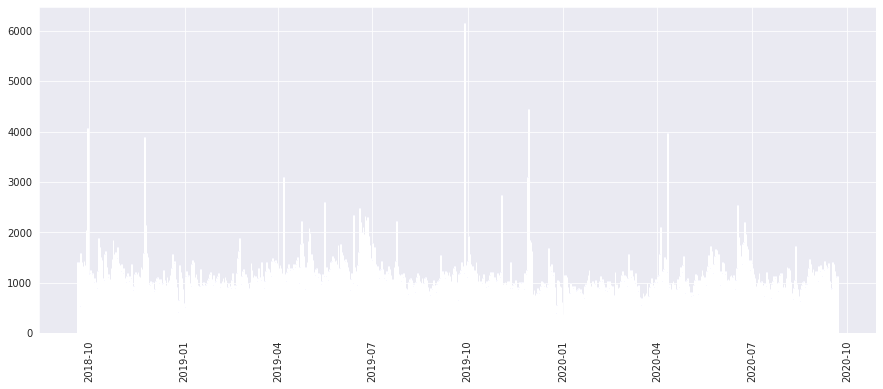

In [ ]:
df = transactions.groupby('t_dat')['price'].agg(['sum', 'mean']).sort_values(by = 't_dat', ascending=False).reset_index()
plt.figure(figsize = (15,6))

plt.bar(df['t_dat'], df['sum'], color='blue')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# The total sales value per day is around 1000 (units are not being disclosed by H&M in the dataset).
df = transactions.groupby('t_dat')['price'].agg(['sum', 'mean']).sort_values(by = 't_dat', ascending=False).reset_index()
fig = px.bar(df, x='t_dat', y='sum', title='Total Daily Sales')

fig.show()

In [ ]:
df["day"] = df['t_dat'].map(lambda x: x.day)
df["month"] = df['t_dat'].map(lambda x: x.month)
df["year"] = df['t_dat'].map(lambda x: x.year)

In [ ]:
# The total sales value is mounting to more than 3000 during particular times of an year like in the second week of April, end of the September and end of the November.
df[df["sum"] > 3000].sort_values(by = ['month', 'year', 'day'], ascending=True)

,t_dat,sum,mean,day,month,year
535,2019-04-06,3100.904898,0.025927,6,4,2019
164,2020-04-11,3961.987763,0.024337,11,4,2020
724,2018-09-29,4071.381305,0.028732,29,9,2018
360,2019-09-28,6161.603068,0.031022,28,9,2019
669,2018-11-23,3891.939441,0.027405,23,11,2018
299,2019-11-28,3103.027932,0.029203,28,11,2019
298,2019-11-29,4444.342390,0.027626,29,11,2019


In [ ]:
##  week day sales
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
days_dict = dict(zip(range(7), days))
df=pd.DataFrame()
df['weekday'] = transactions['t_dat'].dt.weekday.map( days_dict)
df['price'] = transactions.price
df = df.groupby('weekday')['price'].agg(['sum']).sort_values(by = 'sum', ascending=False).reset_index()
fig = px.bar( df, x='weekday', y='sum', title='Weeky sales ', color='weekday')
fig.show()

In [ ]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
days_dict = dict(zip(range(1, 13), months))
df=pd.DataFrame()
df['month'] = transactions['t_dat'].dt.month.map(days_dict)
df['price'] = transactions.price
df = df.groupby('month')['price'].agg(['sum']).sort_values(by = 'sum', ascending=False).reset_index()
fig = px.bar(df, x='month', y='sum', title='Monthly sales ', color="month")
fig.show()